In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-diffmats-cheb)

Here is a $4\times 4$ Chebyshev differentiation matrix.

In [2]:
t, Dx, Dxx = FNC.diffcheb(3, [-1, 1])
print(Dx)

[[-3.16666667  4.         -1.33333333  0.5       ]
 [-1.          0.33333333  1.         -0.33333333]
 [ 0.33333333 -1.         -0.33333333  1.        ]
 [-0.5         1.33333333 -4.          3.16666667]]


We again test the convergence rate.

In [3]:
f = lambda x: x + exp(sin(4 * x))
df_dx = lambda x: 1 + 4 * exp(sin(4 * x)) * cos(4 * x)
d2f_dx2 = lambda x: 4 * exp(sin(4 * x)) * (4 * cos(4 * x) ** 2 - 4 * sin(4 * x))

N = range(5, 75, 5)
err1 = zeros(len(N))
err2 = zeros(len(N))
err = zeros((len(N), 2))
for k, n in enumerate(N):
    t, Dx, Dxx = FNC.diffcheb(n, [-1, 1])
    y = f(t)
    err[k, 0] = norm(df_dx(t) - Dx @ y, inf)
    err[k, 1] = norm(d2f_dx2(t) - Dxx @ y, inf)

Since we expect a spectral convergence rate, we use a semi-log plot for the error.

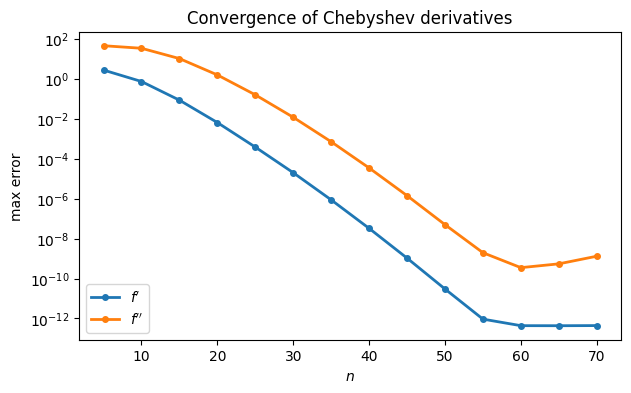

In [4]:
semilogy(N, err, "-o")
xlabel("$n$"), ylabel("max error")
legend(["$f'$", "$f''$"], loc="lower left")
title("Convergence of Chebyshev derivatives");